In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

In [35]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(len(x_train), -1)
x_test = x_test.reshape(len(x_test), -1)
# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train/255.0, x_test/255.0

In [36]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [37]:
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

In [38]:
model = keras.Sequential()
model.add(keras.layers.Input(x_train.shape[-1]))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [39]:
model.fit(x_train, y_train)

1875/1875 [==============================] - 2s 675us/step - loss: 0.4534 - accuracy: 0.8695


In [40]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 507us/step - loss: 0.1491 - accuracy: 0.9548


[0.14910241961479187, 0.954800009727478]

In [34]:
y_pred = model.predict(x_test)

In [26]:
y_pred[:2]

array([[5.1087591e-34, 1.3083466e-23, 6.1199521e-22, 3.6777877e-29,
        1.3837427e-28, 8.1641205e-33, 1.0943539e-30, 1.0000000e+00,
        1.6606168e-33, 1.8348357e-18],
       [7.2066105e-19, 2.3431859e-11, 9.9999082e-01, 9.2229338e-06,
        2.1296791e-17, 8.0238715e-33, 6.4855562e-23, 9.8934044e-23,
        4.5695919e-28, 1.0484943e-28]], dtype=float32)

In [27]:
y_pred_cat = y_pred.argmax(axis=-1)
y_pred_cat

array([7, 2, 1, ..., 4, 5, 6])

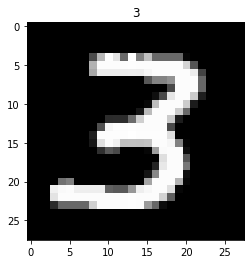

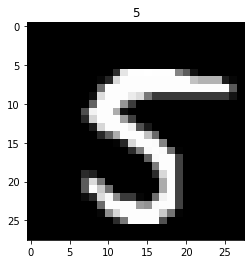

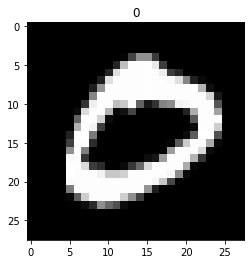

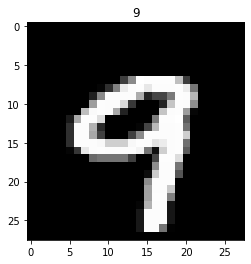

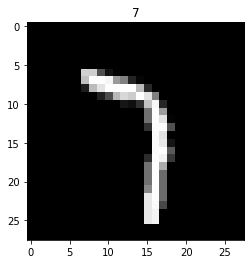

In [28]:
for i in np.random.choice(len(x_test), 5, replace=False):
    x_img = x_test[i].reshape(28, 28)
    plt.imshow(x_img, cmap="gray")
    plt.title(y_pred_cat[i])
    plt.show()

## Softmax
$$
\begin{align}
\text{softmax}(x) = \frac{\exp(x_d)}{\sum_{d=1}^D\exp(x_d)}
\end{align}
$$


In [29]:
x = tf.random.normal((5, 3))
x

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-0.36390316, -0.88187134,  0.15622993],
       [-1.5608184 , -0.48337844, -1.4828557 ],
       [-0.3680153 , -0.19455971, -0.26203477],
       [-0.7501367 , -1.245955  , -0.94421417],
       [-0.7720077 , -1.7729483 ,  0.54544526]], dtype=float32)>

In [30]:
tf.keras.layers.Softmax()(x)

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.3050658 , 0.18173677, 0.5131974 ],
       [0.19927332, 0.5852958 , 0.21543087],
       [0.30291942, 0.36029473, 0.33678588],
       [0.4110716 , 0.25037232, 0.33855614],
       [0.19602337, 0.07204518, 0.73193145]], dtype=float32)>

In [31]:
tf.keras.layers.Softmax()(x).numpy().sum(axis=-1)

array([1.       , 1.       , 1.       , 1.0000001, 1.       ],
      dtype=float32)

In [32]:
def softmax(x):
    exp_x = tf.exp(x)
    exp_sum = tf.math.reduce_sum(exp_x, axis=-1, keepdims=True)
    return exp_x / exp_sum

In [33]:
softmax(x)

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.3050658 , 0.18173677, 0.5131974 ],
       [0.1992733 , 0.5852958 , 0.21543087],
       [0.30291942, 0.36029473, 0.33678588],
       [0.41107157, 0.2503723 , 0.3385561 ],
       [0.19602337, 0.07204518, 0.73193145]], dtype=float32)>

Try with the Fashion MNIST dataset. Label encoding is in following table
https://github.com/zalandoresearch/fashion-mnist#labels

In [34]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step
